<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/unsupervised_selection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

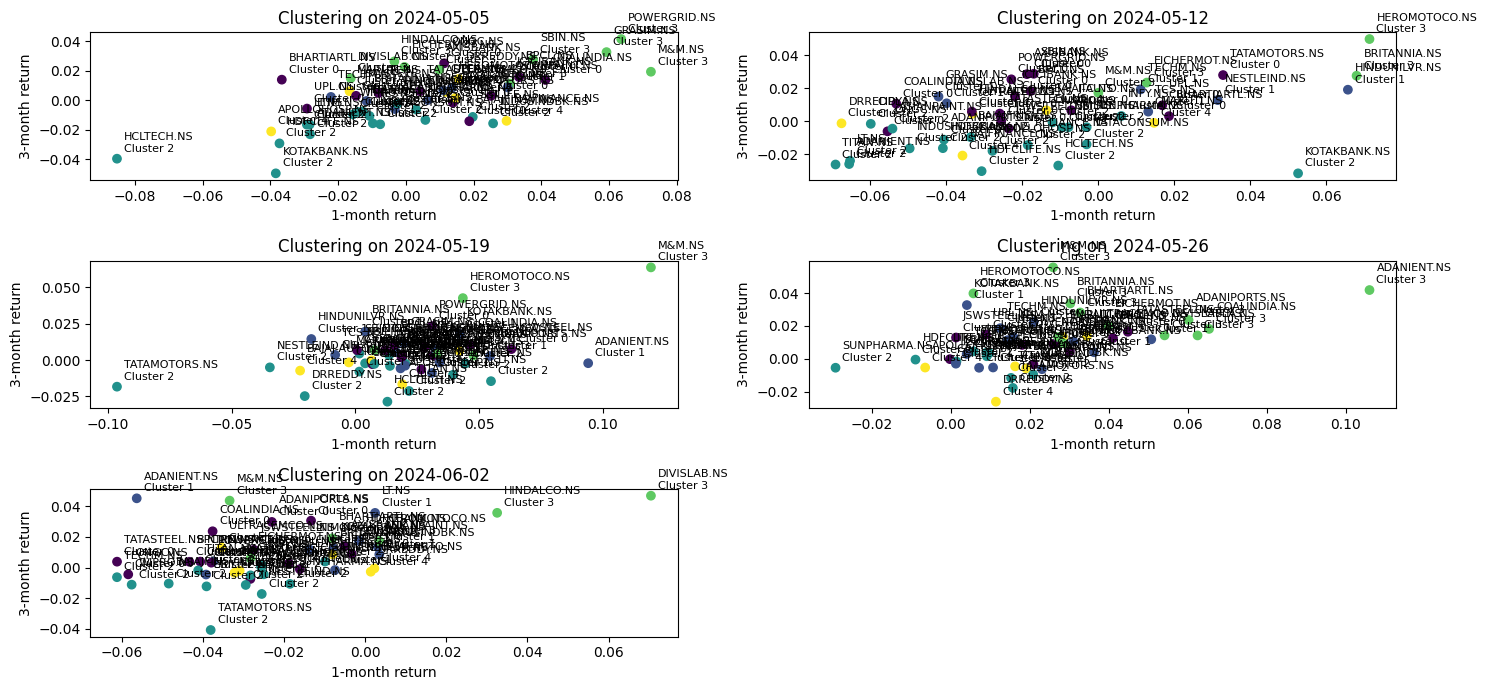


Cluster analysis for 2024-06-02:
         dollar_volume    adj close       atr   bb_high    bb_low    bb_mid  \
cluster                                                                       
0          5995.882523   688.515465  1.643006  6.378517  6.276249  6.327383   
1          7401.158116  2654.395288  0.095333  7.857233  7.753178  7.805205   
2          4186.817063  1888.625035  0.408309  7.372656  7.306014  7.339335   
3          5960.314240  3139.904215  2.003572  7.867274  7.698526  7.782900   
4          3766.648570  8164.028402  1.229063  9.003644  8.921644  8.962644   

         garman_klass_vol      macd        rsi  return_1m  return_2m  \
cluster                                                                
0                0.000185  0.651301  52.752994  -0.029626  -0.000749   
1                0.000137  0.108859  50.776525  -0.015460   0.007587   
2                0.000186 -0.917556  39.752104  -0.033821  -0.014909   
3                0.000155  2.368614  67.114053   0.0

In [17]:
# Load the data
df = pd.read_csv('/content/nifty_50_weekly_data_lat.csv')

# Convert date to datetime and sort
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Get the last two dates
last_two_dates = df['date'].unique()[-5:]

# Filter the dataframe to include only the last two dates
df_last_two = df[df['date'].isin(last_two_dates)]

# Select features for clustering
features = ['dollar_volume', 'adj close', 'atr', 'bb_high', 'bb_low', 'bb_mid',
            'garman_klass_vol', 'macd', 'rsi', 'return_1m', 'return_2m',
            'return_3m', 'return_6m', 'return_9m', 'return_12m']

# Prepare the data
X = df_last_two[features]

# Handle missing values (if any)
X = X.fillna(X.mean())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering
n_clusters = 5  # You can adjust this number
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_last_two['cluster'] = kmeans.fit_predict(X_scaled)

# Create a mapping of cluster numbers to cluster names
cluster_names = {i: f'Cluster {i}' for i in range(n_clusters)}

# Visualize the clusters using 1-month return vs 3-month return
plt.figure(figsize=(15, 7))

for i, date in enumerate(last_two_dates):
    plt.subplot(3, 2, i+1)
    df_date = df_last_two[df_last_two['date'] == date]
    scatter = plt.scatter(df_date['return_1m'], df_date['return_3m'], c=df_date['cluster'], cmap='viridis')
    plt.xlabel('1-month return')
    plt.ylabel('3-month return')
    plt.title(f'Clustering on {date.date()}')

    # Add annotations for each point
    for _, row in df_date.iterrows():
        plt.annotate(f"{row['ticker']}\n{cluster_names[row['cluster']]}",
                     (row['return_1m'], row['return_3m']),
                     fontsize=8,
                     xytext=(5, 5),
                     textcoords='offset points')

plt.tight_layout()
plt.show()

# Analyze the clusters for the most recent date
latest_date = last_two_dates[-1]
df_latest = df_last_two[df_last_two['date'] == latest_date]

print(f"\nCluster analysis for {latest_date.date()}:")
cluster_means = df_latest.groupby('cluster')[features].mean()
print(cluster_means)

# Identify the cluster with the highest average 1-month return
best_cluster = cluster_means['return_1m'].idxmax()
print(f"\nCluster {best_cluster} has the highest average 1-month return.")
print("Stocks in this cluster:")
print(df_latest[df_latest['cluster'] == best_cluster]['ticker'].tolist())

In [18]:
# Analyze the clusters for the most recent date
latest_date = last_two_dates[-1]
df_latest = df_last_two[df_last_two['date'] == latest_date]

print(f"\nCluster analysis for {latest_date.date()}:")

# Calculate cluster characteristics
cluster_characteristics = df_latest.groupby('cluster')[features].agg(['mean', 'std'])
print("\nCluster Characteristics:")
print(cluster_characteristics)

# Save each cluster to a separate dataframe
cluster_dfs = {}
for i in range(n_clusters):
    cluster_dfs[f'cluster_{i}'] = df_latest[df_latest['cluster'] == i]

    print(f"\nCluster {i} Summary:")
    print(cluster_dfs[f'cluster_{i}'][['ticker'] + features].describe())

    # Save to CSV (optional)
    cluster_dfs[f'cluster_{i}'].to_csv(f'cluster_{i}_{latest_date.date()}.csv', index=False)
    print(f"Cluster {i} data saved to cluster_{i}_{latest_date.date()}.csv")

# Identify the cluster with the highest average 1-month return
best_cluster = cluster_characteristics['return_1m']['mean'].idxmax()
print(f"\nCluster {best_cluster} has the highest average 1-month return.")
print("Stocks in this cluster:")
print(df_latest[df_latest['cluster'] == best_cluster]['ticker'].tolist())

# Function to print top and bottom N stocks for a given feature
def print_top_bottom_stocks(cluster_df, feature, n=5):
    top_n = cluster_df.nlargest(n, feature)[['ticker', feature]]
    bottom_n = cluster_df.nsmallest(n, feature)[['ticker', feature]]
    print(f"\nTop {n} stocks by {feature}:")
    print(top_n)
    print(f"\nBottom {n} stocks by {feature}:")
    print(bottom_n)

# Print top and bottom stocks for each cluster based on 1-month return
for i, cluster_df in cluster_dfs.items():
    print(f"\n{i.upper()} - Top and Bottom Stocks by 1-month Return:")
    print_top_bottom_stocks(cluster_df, 'return_1m')


Cluster analysis for 2024-06-02:

Cluster Characteristics:
        dollar_volume                 adj close                    atr  \
                 mean          std         mean          std      mean   
cluster                                                                  
0         5995.882523  4067.148645   688.515465   442.503316  1.643006   
1         7401.158116  6652.546706  2654.395288  1028.360988  0.095333   
2         4186.817063  2627.401159  1888.625035  1458.217636  0.408309   
3         5960.314240  2927.852089  3139.904215  1881.496326  2.003572   
4         3766.648570  1514.627068  8164.028402  2821.347079  1.229063   

                    bb_high              bb_low            ... return_2m  \
              std      mean       std      mean       std  ...      mean   
cluster                                                    ...             
0        0.952556  6.378517  0.676004  6.276249  0.675097  ... -0.000749   
1        1.182316  7.857233  0.392110  7.75